In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [40]:
df = pd.read_csv('/Users/purva/Desktop/Data Science Boot Camp/results2014.csv')

In [41]:
df1 = df.drop(['ctz','state','city'], axis = 1)

In [42]:
df1.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72


In [53]:
# Define the features and the outcome.
X = df1.drop(['gender', 'name','bib','country'], axis = 1)
X = X.replace(to_replace='-', value=0)
X.convert_objects(convert_numeric=True).dtypes
y = df1['gender']

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y == 'M', 0, 1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


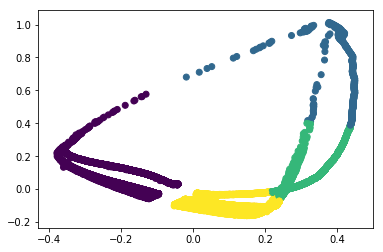

Comparing k-means clusters against the data:
col_0      0      1
row_0              
0          0  14329
1        391     38
2       3142      0
3      14084      0


In [54]:

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [55]:
from sklearn import metrics
metrics.adjusted_rand_score(y, y_pred)

0.7988339249504911

In [57]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0      0    1     2     3
row_0                        
0          0    0   888  4818
1      14329    0     0     0
2          0    0     0  9266
3          0  429  2254     0


In [58]:
from sklearn import metrics
metrics.adjusted_rand_score(predict_mini, y_pred)

0.7824098637552178